[0]	train-auc:0.80743
[1]	train-auc:0.82676
[2]	train-auc:0.84891
[3]	train-auc:0.84247
[4]	train-auc:0.84097
[5]	train-auc:0.83830
[6]	train-auc:0.84313
[7]	train-auc:0.84733
[8]	train-auc:0.85167
[9]	train-auc:0.85940
[10]	train-auc:0.85757
[11]	train-auc:0.86321
[12]	train-auc:0.86329
[13]	train-auc:0.86676
[14]	train-auc:0.86729
[15]	train-auc:0.86896
[16]	train-auc:0.86916
[17]	train-auc:0.86974
[18]	train-auc:0.87363
[19]	train-auc:0.87231
[20]	train-auc:0.87118
[21]	train-auc:0.87052
[22]	train-auc:0.87115
[23]	train-auc:0.87336
[24]	train-auc:0.87220
[25]	train-auc:0.87144
[26]	train-auc:0.87071
[27]	train-auc:0.86974
[28]	train-auc:0.87029
[29]	train-auc:0.86961
[30]	train-auc:0.87024
[31]	train-auc:0.87034
[32]	train-auc:0.87186
[33]	train-auc:0.87237
[34]	train-auc:0.87172
[35]	train-auc:0.87163
[36]	train-auc:0.87244
[37]	train-auc:0.87211
[38]	train-auc:0.87237
[39]	train-auc:0.87288
[40]	train-auc:0.87193
[41]	train-auc:0.87201
[42]	train-auc:0.87326
[43]	train-auc:0.8740

/run/media/mapple/1CBAC92C060AAFDC/visual studio code/研究生/machine-learning/markdown/virtualenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/run/media/mapple/1CBAC92C060AAFDC/visual studio code/研究生/machine-learning/markdown/virtualenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21709 (\N{CJK UNIFIED IDEOGRAPH-54CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/run/media/mapple/1CBAC92C060AAFDC/visual studio code/研究生/machine-learning/markdown/virtualenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31958 (\N{CJK UNIFIED IDEOGRAPH-7CD6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/run/media/mapple/1CBAC92C060AAFDC/visual studio code/研究生/machine-learning/markdown/virtualenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:

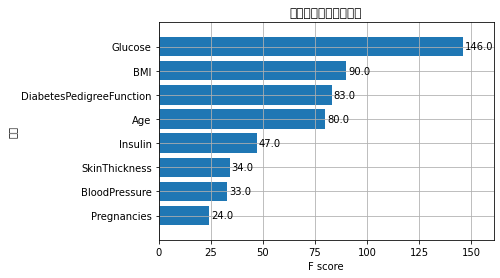

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

# 导入数据集
df = pd.read_csv("../resource/diabetes.csv")
data=df.iloc[:,:8]
target=df.iloc[:,-1]
 
# 切分训练集和测试集
train_x, test_x, train_y, test_y = train_test_split(data,target,test_size=0.2,random_state=7)

# xgboost模型初始化设置
dtrain=xgb.DMatrix(train_x,label=train_y)
dtest=xgb.DMatrix(test_x)
watchlist = [(dtrain,'train')]

# booster:
params={'booster':'gbtree',
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'max_depth':5,
        'lambda':10,
        'subsample':0.75,
        'colsample_bytree':0.75,
        'min_child_weight':2,
        'eta': 0.025,
        'seed':0,
        'nthread':8,
        'gamma':0.15,
        'learning_rate' : 0.01}

# 建模与预测：50棵树
bst=xgb.train(params,dtrain,num_boost_round=50,evals=watchlist)
ypred=bst.predict(dtest)
 
# 设置阈值、评价指标
y_pred = (ypred >= 0.5)*1
print ('Precesion: %.4f' %metrics.precision_score(test_y,y_pred))
print ('Recall: %.4f' % metrics.recall_score(test_y,y_pred))
print ('F1-score: %.4f' %metrics.f1_score(test_y,y_pred))
print ('Accuracy: %.4f' % metrics.accuracy_score(test_y,y_pred))
print ('AUC: %.4f' % metrics.roc_auc_score(test_y,ypred))

ypred = bst.predict(dtest)
print("测试集每个样本的得分\n",ypred)
ypred_leaf = bst.predict(dtest, pred_leaf=True)
print("测试集每棵树所属的节点数\n",ypred_leaf)
ypred_contribs = bst.predict(dtest, pred_contribs=True)
print("特征的重要性\n",ypred_contribs )

xgb.plot_importance(bst,height=0.8,title='影响糖尿病的重要特征', ylabel='特征')
plt.rc('font', family='Arial Unicode MS', size=14)
plt.show()